# Exercise 1 notebook B

The submission deadline is **25.11.2024 23:55.**

Please write your own student_id in the same format as in the example (especially using the same variable name) where it says "YOUR CODE HERE".

In [1]:
# Please enter your student ID here
student_id = 12433688

## Task Description    
    
This is the second part of the exercise. For better comparability, please load our prepared data for solving this exercise and do not use the dataset that you created in Part 1A.

The goal of this exercise is to train a machine learning (ML) model on the data we prepared in the first notebook. The goal of the model is to predict the type of disruption (`disruption`) given the features (all other columns, like temperature etc.).

First we will visualize the data to get a better understanding, then we will identify suitable machine learning methods and train a model.
Finally we will test the trained ML model on a holdout test dataset.

Out of the total 100 points, this notebook makes up for 45 points.

**Notebook A (data preparation), 55 points:**
 - Task 1: 20 points
 - Task 2: 15 points
 - Task 3: 10 points
 - Task 4: 5 points
 - Task 5: 5 points

**Notebook B (this notebook), 45 points:**
 - Task 6: 15 points (Visualization)
 - Task 7: 25 points (Train models)
 - Task 8: 5 points (Test models)

## Setup Python and load data
Import necessary Python modules and load the preprocessed data from the shared folder.

### Add imports

In [2]:
# Note: Use only the libraries below. You can import members (e.g. functions) from these libraries in your code.

import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import sklearn

import typing

### Load data
Load the preprocessed data from the shared folder: 

In [3]:
with open(os.path.join(os.environ["HOME"], "shared", "188.995-2024W", "data", "data_processed.pickle"),"rb") as fp:
     data_processed = pickle.load(fp)

As you know from the previous exercise, our data is not in a good state and needs some cleaning. Same holds true in this case. In the disruption column we have different descriptions meaning the same thing. With the following code we can group these things together to get a much clearer picture:

In [4]:
# mapping dictionary

mapping = {
    'Polizeieinsatz': 'Operation',
    'Rettungseinsatz': 'Operation',
    'Polizeieinsatz Verspätungen': 'Operation',
    'Feuerwehreinsatz': 'Operation',
    'Rettungseinsatz Verspätungen': 'Operation',
    'Schadhaftes Fahrzeug': 'Vehicle in poor condition',
    'Schadhaftes Fahrzeug Verspätungen': 'Vehicle in poor condition',
    'Wagengebrechen': 'Vehicle in poor condition',
    'Schadhafter Zug': 'Vehicle in poor condition',
    'Fahrzeug Verspätungen': 'Vehicle in poor condition',
    'Fahrzeug': 'Vehicle in poor condition',
    'erhöhtes Fahrgastaufkommen': 'Increased passenger volume',
    'Erhöhtes Fahrgastaufkommen': 'Increased passenger volume',
    'erhöhtes Fahrgastaufkommen Verspätungen': 'Increased passenger volume',
    'Verspätungen': 'Delay',
    'Verspätung': 'Delay',
    'Verkehrsunfall Verspätungen': 'Traffic accident',
    'Verkehrsunfall': 'Traffic accident',
    'Fremder Verkehrsunfall': 'Traffic accident',
    'Fremder Verkehrsunfall Verspätungen': 'Traffic accident',
    'Verkehrsstörung Verspätungen': 'Traffic jam',
    'Verkehrsstörung': 'Traffic jam',
    'Verkehrsbedingte Verspätung': 'Traffic jam',
    'Verkehrsbedingte ': 'Traffic jam',
    'Verkehrsbedingte Verspätungen': 'Traffic jam',
    'Verkehrsbedingt': 'Traffic jam',
    'Verkehrsbedingt Verspätungen': 'Traffic jam',
    'Verkehrsbedingte Verspätung Verspätungenen': 'Traffic jam',
    'Verkehrsbedingte Verspätung Verspätungen': 'Traffic jam',
    'Veranstaltung': 'Event',
    'Vienna': 'Event',
    'Vienna-City-Marathon': 'Event',
    'Regenbogenparade': 'Event',
    'Demonstration': 'Event',
    'Staatsbesuch': 'Event',
    'Opernball': 'Event',
    'Erkrankung eines Fahrgastes': 'Personnel problems',
    'Erkrankung eines': 'Personnel problems',
    'Erkrankung': 'Personnel problems',
    'Fahrleitungsgebrechen': 'General infrastructure',
    'Wasserrohrgebrechen': 'General infrastructure',
    'Stromstörung': 'General infrastructure',
    'Gasrohrgebrechen': 'General infrastructure',
    'Gleisschaden': 'Transportation infrastructure',
    'Weichenstörung': 'Transportation infrastructure',
    'Gleisbauarbeiten': 'Transportation infrastructure',
    'Signalstörung': 'Transportation infrastructure',
    'Signalstörung Verspätungen': 'Transportation infrastructure',
    'Stellwerkstörung': 'Transportation infrastructure',
    'Betriebsstörung': 'Operational disruption',
    'Betriebseinstellung': 'Operational disruption',
    'Fahrtbehinderung': 'Maliciousness',
    'Sachbeschädigung': 'Maliciousness',
    'Falschparker': 'Maliciousness',
    'Witterungsbedingt': 'Weather',
    'Sturmschaden': 'Weather',
    'Bauarbeiten': 'Construction work',
    'Umleitung': 'Construction work',
    'Verunreinigung': 'Contamination'
}

# Use the replace method to update the column
data_processed['disruption'] = data_processed['disruption'].replace(mapping)

Now transform the values from your target column `disruption` and save the new values in the new column `class`.

In [5]:
from sklearn.preprocessing import LabelEncoder

data_processed = data_processed.reset_index()
target_column = 'disruption'
label_encoder = LabelEncoder()
label_encoder.fit(data_processed[target_column])
data_processed['class'] = label_encoder.transform(data_processed[target_column])


In [6]:
data_processed.head(5)

,year,month,day,temp_dailyMin,temp_dailyMax,temp_dailyMean,temp_dailyMedian,hum_dailyMin,hum_dailyMax,hum_dailyMean,wind_dailyMin,wind_dailyMax,wind_dailyMean,precip,disruption,bus,subway,tram,duration,class
0,2013,9,14,12.5,18.8,16.0,16.7,65,97,76.333333,3,4,3.666667,4.1,Operation,True,False,False,0 days 01:35:00,7
1,2013,9,14,12.5,18.8,16.0,16.7,65,97,76.333333,3,4,3.666667,4.1,Maliciousness,False,False,True,0 days 03:06:00,6
2,2013,9,14,12.5,18.8,16.0,16.7,65,97,76.333333,3,4,3.666667,4.1,Maliciousness,False,False,True,0 days 00:47:00,6
3,2013,9,14,12.5,18.8,16.0,16.7,65,97,76.333333,3,4,3.666667,4.1,Delay,False,False,True,0 days 02:21:00,2
4,2013,9,14,12.5,18.8,16.0,16.7,65,97,76.333333,3,4,3.666667,4.1,Maliciousness,False,False,True,0 days 00:49:00,6


In [7]:
assert data_processed['class'].nunique() == 15, "There should be 15 classes"

In [8]:
assert data_processed.shape[0] > 66000, "there should be more than 66000 rows in the merged dataset"
assert data_processed.shape[1] >= 17, "5 columns for disruptions, 11 feature columns, 1 class column"

assert not data_processed.isna().any().any(), "All missing values should be eliminated!"
assert not data_processed['disruption'].isna().any(), "The dataframe must have a disruption column!"
assert not data_processed['bus'].isna().any(), "The dataframe must have a bus column!"
assert not data_processed['subway'].isna().any(), "The dataframe must have a subway column!"
assert not data_processed['tram'].isna().any(), "The dataframe must have a tram column!"
assert not data_processed['duration'].isna().any(), "The dataframe must have a duration column!"

In [9]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94657 entries, 0 to 94656
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   year              94657 non-null  int32          
 1   month             94657 non-null  int32          
 2   day               94657 non-null  int32          
 3   temp_dailyMin     94657 non-null  float64        
 4   temp_dailyMax     94657 non-null  float64        
 5   temp_dailyMean    94657 non-null  float64        
 6   temp_dailyMedian  94657 non-null  float64        
 7   hum_dailyMin      94657 non-null  int64          
 8   hum_dailyMax      94657 non-null  int64          
 9   hum_dailyMean     94657 non-null  float64        
 10  wind_dailyMin     94657 non-null  int64          
 11  wind_dailyMax     94657 non-null  int64          
 12  wind_dailyMean    94657 non-null  float64        
 13  precip            94657 non-null  float64        
 14  disrup

In [10]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


## Task 6: Visualization (15 Poins)

To better understand the dataset, create visualizations of the merged data using `pandas`, `matplotlib` or `seaborn` that help explore potential relationships between the variables before developing a model.
We are particularly interested in the relationships of the variable to be modeled (`disruptions`) with the other columns (later features).

- Make at least **3 different plots**: use **2 different plot types** and **2 different libraries**
- Use proper labeling: include title, axis labels, legends, ... . Your plots should present information clearly! -> http://imgs.xkcd.com/comics/convincing.png. 

**Note:** Choice of a proper chart type is essential. Points might be subtracted when using inappropriate plots and descriptions, so please *do not* just use all possible plotting functions without understanding and justification.


To gain valuable insights on the data, you might wanna look at the overall development over time, have a closer look at one specific year (e.g. 2021) or compare different years. For a better overview, you could also plot the top n most frequently occurring disruptions in more detail or their occurencies over the year. 
We want you to get good insights into the dataset, therefore please explore the dataset in depth, try different visualization libraries and do not only use the visualizations described by us.

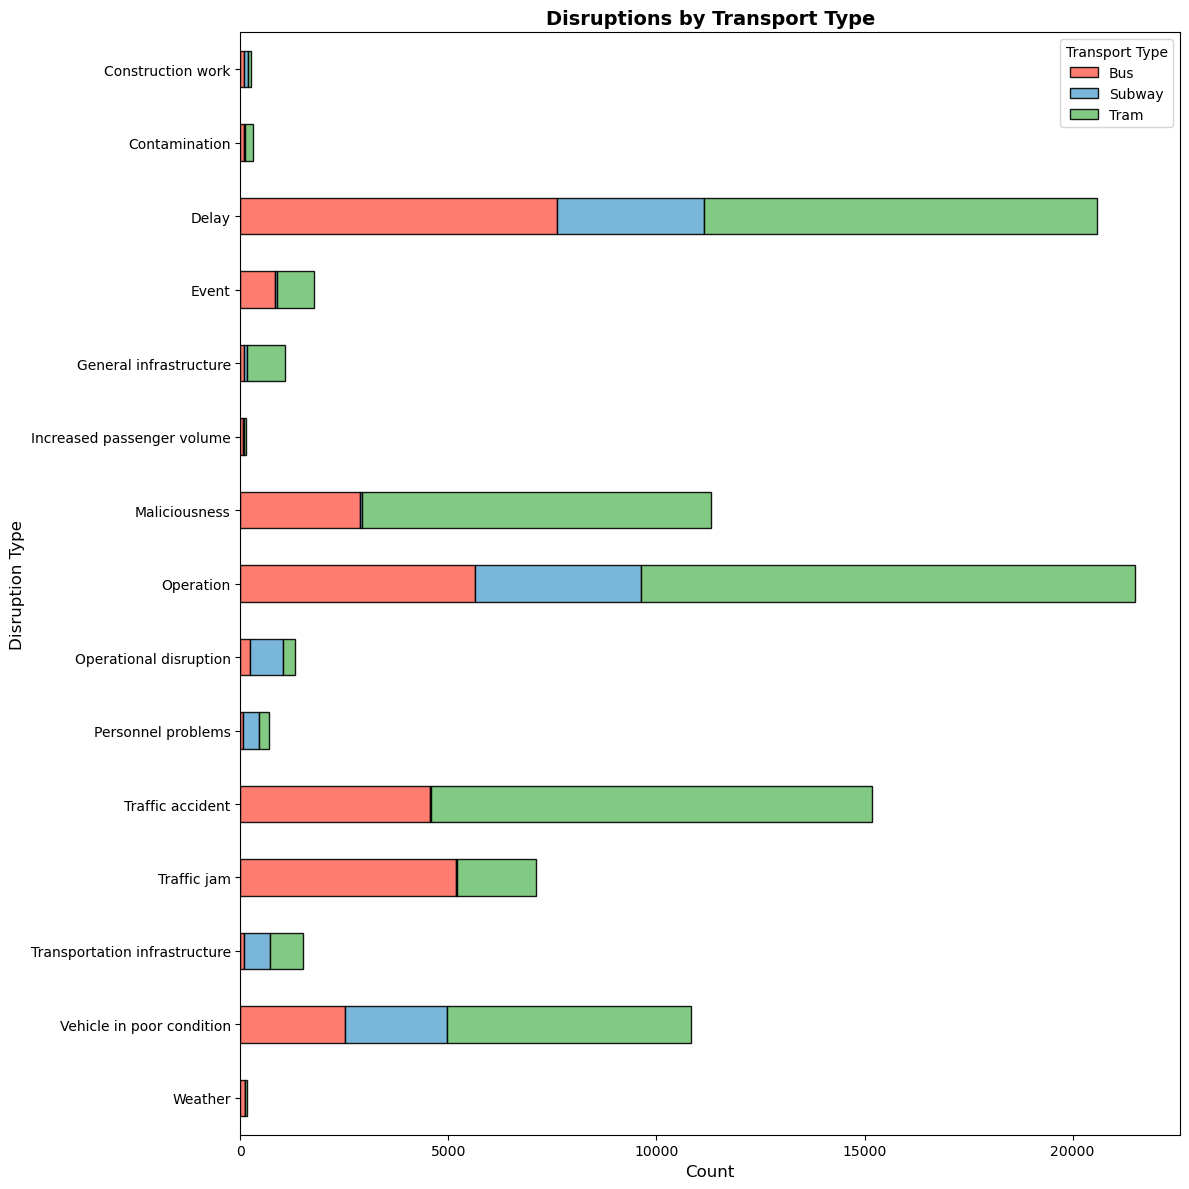

In [11]:
# Filter data to include only rows where bus, subway, or tram is True
filtered_data = data_processed[(data_processed["bus"]) | (data_processed["subway"]) | (data_processed["tram"])]
disruption_transport_counts = filtered_data.groupby("disruption")[["bus", "subway", "tram"]].sum()
disruption_transport_counts.plot(kind="barh",stacked=True,figsize=(12, 12),color=["#FF6F61", "#6BAED6", "#74C476"],alpha=0.9,edgecolor="black",)
plt.title("Disruptions by Transport Type", fontsize=14, weight="bold")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Disruption Type", fontsize=12)
plt.legend(["Bus", "Subway", "Tram"], title="Transport Type", loc="upper right")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


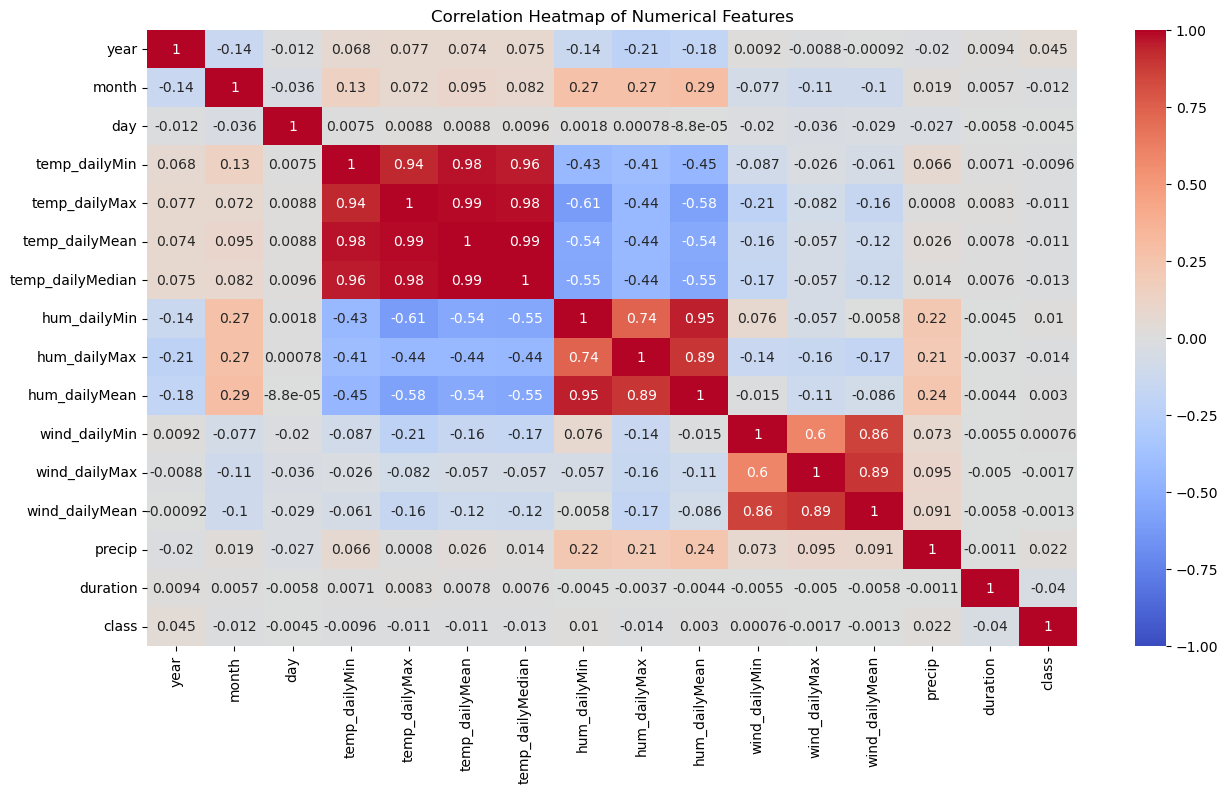

In [12]:
numeric_data = data_processed.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


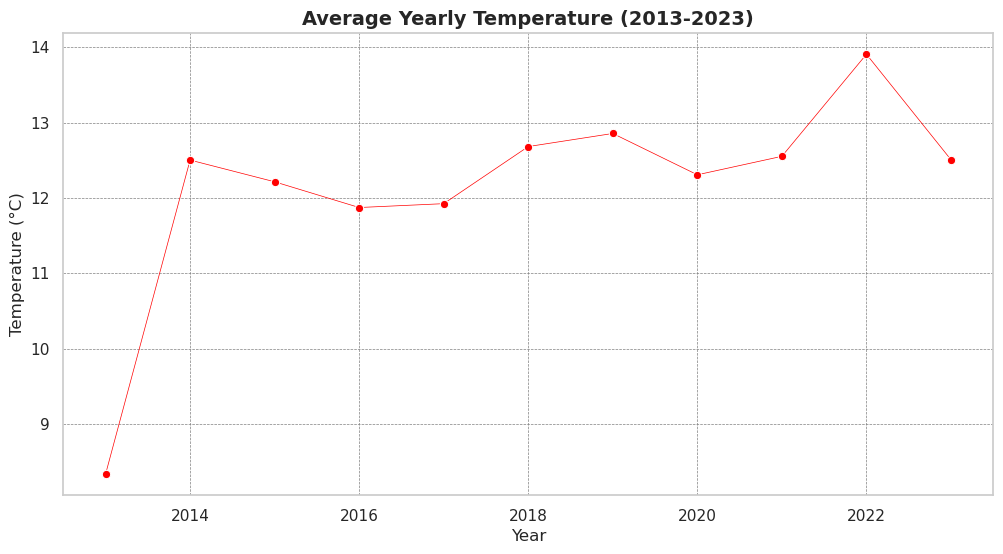

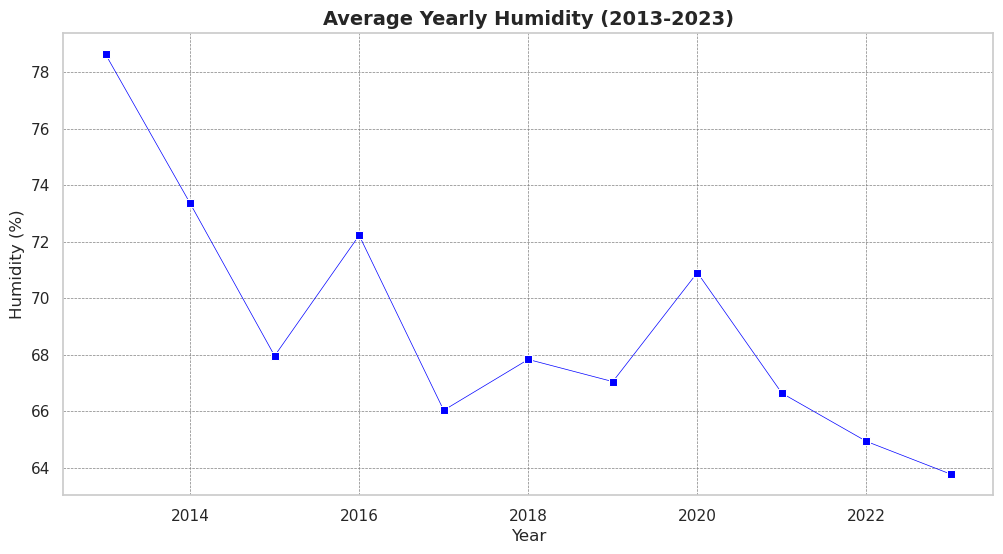

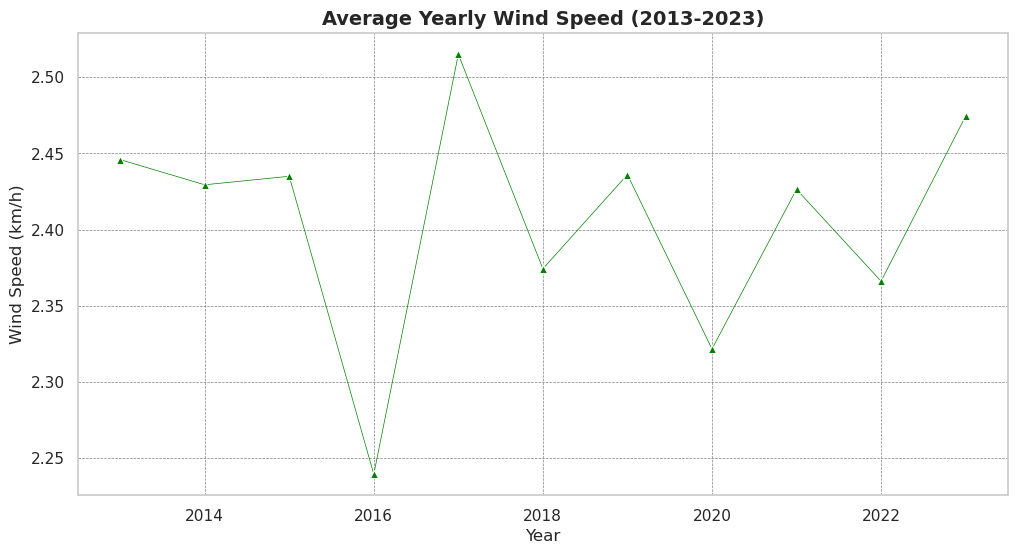

In [13]:
# Group by year and calculate the yearly averages
yearly_averages = (data_processed.groupby("year")[["temp_dailyMean", "hum_dailyMean", "wind_dailyMean"]].mean().reset_index())
sns.set_theme(style="whitegrid")

# Plot 1: Average Yearly Temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_averages, x="year", y="temp_dailyMean", marker="o", color="red", linewidth=0.5)
plt.title("Average Yearly Temperature (2013-2023)", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# Plot 2: Average Yearly Humidity
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_averages, x="year", y="hum_dailyMean", marker="s", color="blue", linewidth=0.5)
plt.title("Average Yearly Humidity (2013-2023)", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Humidity (%)")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# Plot 3: Average Yearly Wind Speed
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_averages, x="year", y="wind_dailyMean", marker="^", color="green", linewidth=0.5)
plt.title("Average Yearly Wind Speed (2013-2023)", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Wind Speed (km/h)")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


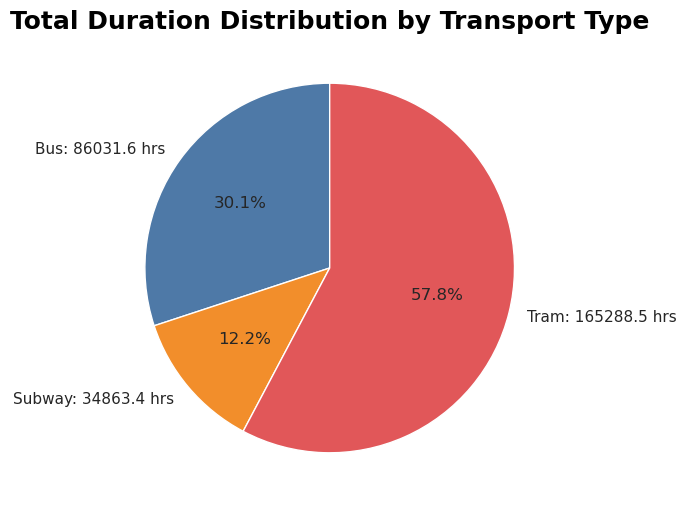

In [14]:
bus_duration = data_processed[data_processed['bus'] == True]['duration'].sum().total_seconds() / 3600  # Convert to hours
subway_duration = data_processed[data_processed['subway'] == True]['duration'].sum().total_seconds() / 3600
tram_duration = data_processed[data_processed['tram'] == True]['duration'].sum().total_seconds() / 3600

data = {'Bus': bus_duration,'Subway': subway_duration,'Tram': tram_duration}
labels = [f'{key}: {value:.1f} hrs' for key, value in data.items()]

plt.figure(figsize=(8, 6))
plt.pie(data.values(),labels=labels,autopct='%1.1f%%',startangle=90,colors=['#4e79a7', '#f28e2b', '#e15759'],)
plt.title('Total Duration Distribution by Transport Type',fontsize=18, fontweight='bold',color='black')
plt.show()


In [15]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!

# Classification models

## Task 7: Model for disruption class prediction (25 Points)

Build and train a model using weather and traffic data from 2013 until 2023 (incl.) using `scikit-learn`.

You have to do the following steps:

1. Create train, validation, and test splits - **2**
1. First ML experiments - **2**
1. Explore the different metrics - **3**
1. Explore different scaling approaches - **3**
1. Experiment with different train/valid splits - **3**
1. Experiment with different feature selection methods - **3**
1. Try out different ML algorithms - **3**
1. Explore the effect of parameters with 10-fold cross-validation - **3**
1. Present your best performing results - **3**

General advices: Make sure your results are reproducible. You can use your student ID as seed.

### 7.1 Create train, validation, and test splits

First, we need to create a dataset that will be used to train a model. 

Due to performance reasons we only use a fraction of the overall data set for our computations.

In [16]:
def sample_data(df: pd.DataFrame, fraction: float = 0.7, seed: int = student_id) -> pd.DataFrame:
    data_shortened = df.copy()
    data_shortened['duration'] = (data_shortened['duration'] - data_shortened['duration'].min()) / np.timedelta64(1, 'D')
    data_shortened = data_shortened.drop(columns=['year', 'month', 'day', 'disruption', 'temp_dailyMin', 'temp_dailyMax', 'temp_dailyMedian', 'hum_dailyMin', 'hum_dailyMax', 'wind_dailyMin', 'wind_dailyMax'])
    return data_shortened

# Usage
data_shortened = sample_data(data_processed)
data_shortened.head()


,temp_dailyMean,hum_dailyMean,wind_dailyMean,precip,bus,subway,tram,duration,class
0,16.0,76.333333,3.666667,4.1,True,False,False,0.065972,7
1,16.0,76.333333,3.666667,4.1,False,False,True,0.129167,6
2,16.0,76.333333,3.666667,4.1,False,False,True,0.032639,6
3,16.0,76.333333,3.666667,4.1,False,False,True,0.097917,2
4,16.0,76.333333,3.666667,4.1,False,False,True,0.034028,6


In [17]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


Split the `data_shortened` DataFrame into train (this will be further split to train and validation) and test sets.
- Train & validation set: 80% of the overall data set
- Test set: remaining 20% of the data

In [18]:
from sklearn.model_selection import train_test_split

def split_data(
    df: pd.DataFrame, test_size: float = 0.2, target_column: str = 'class', seed: int = student_id) -> typing.Tuple[pd.DataFrame, pd.DataFrame]:
    df_train, df_test = train_test_split(df, test_size=test_size,random_state=seed)
    return df_train, df_test



In [19]:
data_train, data_test = split_data(data_shortened)

In [20]:
data_train.head(5)

,temp_dailyMean,hum_dailyMean,wind_dailyMean,precip,bus,subway,tram,duration,class
47248,15.800000,84.666667,1.333333,0.0,False,False,True,0.077083,10
12624,1.933333,69.333333,2.333333,0.0,False,False,True,0.229167,7
25440,7.633333,71.333333,2.000000,0.0,False,False,True,0.040278,7
64878,16.833333,89.666667,1.333333,2.5,True,False,False,0.086806,11
82272,13.533333,69.333333,2.666667,1.0,False,True,False,0.078472,7


In [21]:
data_test.head(5)

,temp_dailyMean,hum_dailyMean,wind_dailyMean,precip,bus,subway,tram,duration,class
79452,28.266667,41.666667,1.333333,0.0,True,False,False,1.688889,0
93475,23.300000,48.333333,1.666667,0.0,False,True,False,0.028472,13
82665,14.500000,78.666667,1.000000,0.0,True,False,False,0.032639,7
53775,14.100000,91.666667,2.333333,27.9,False,False,True,0.040972,6
74813,22.266667,53.333333,3.333333,0.0,False,False,True,0.051389,12


In [22]:
assert data_train.shape[1] == data_test.shape[1], "Both dataframes should have the same number of columns!!"
assert data_train.shape[1] == data_shortened.shape[1], "All columns should be retained!!"
assert data_train.shape[0] < data_shortened.shape[0], "data_train should be a subset of data_shortened, so it should have less rows!"
assert data_test.shape[0] < data_shortened.shape[0], "data_test should be a subset of data_shortened, so it should have less rows!"

In [23]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In order to train and validate a machine learning model, we need a set of training samples, and some validation data.
We want to treat our test dataset as "hidden test data", so we do not want to touch it in the experiments to choose and optimize our ML model. Instead we split off another small validation set from our training data.
* Split the `data_train` into train and validation sets. 
* Separate the features from the target attribute to predict (type of disruption: `class`). `X_` valiables should contain features whily `y_` variables contain the target values.

Reminder: Do not use imports other than those from Python's standard library, pandas, numpy, scipy, matplotlib, seaborn and scikit-learn.


In [24]:
def create_dataset(df: pd.DataFrame, valid_size: float, random_state: student_id) -> typing.Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    df_train, df_valid = train_test_split(df, test_size=valid_size, random_state=student_id)
    
    X_train = df_train.drop(columns=['class'])
    y_train = df_train['class']
    X_valid = df_valid.drop(columns=['class'])
    y_valid = df_valid['class']
    return X_train, y_train, X_valid, y_valid


In [25]:
valid_split = 0.2
X_train, y_train, X_valid, y_valid = create_dataset(data_train, valid_size=valid_split, random_state=student_id)

In [26]:
X_train

,temp_dailyMean,hum_dailyMean,wind_dailyMean,precip,bus,subway,tram,duration
33115,9.600000,78.666667,4.000000,4.20,False,False,True,0.064583
60314,11.650000,83.333333,2.666667,13.70,False,True,False,0.015278
58804,17.466667,49.000000,1.333333,0.00,True,False,False,0.128472
9380,18.066667,80.000000,2.000000,0.00,True,False,False,0.109028
88900,3.766667,61.333333,2.333333,0.01,True,False,False,0.027778
...,...,...,...,...,...,...,...,...
30622,21.333333,52.333333,2.333333,0.00,False,False,True,0.081250
71603,6.600000,32.333333,2.000000,0.00,False,False,True,0.082639
24192,15.433333,71.333333,1.333333,0.00,True,False,False,0.166667
87432,0.066667,82.666667,3.000000,2.40,False,False,True,0.014583


In [27]:
y_train.head(5)

33115    10
60314     2
58804    11
9380      2
88900    10
Name: class, dtype: int64

In [30]:
X_valid.head(5)

,temp_dailyMean,hum_dailyMean,wind_dailyMean,precip,bus,subway,tram,duration
41327,-1.100000,70.333333,4.333333,2.0,True,False,False,0.029861
35474,-9.633333,67.000000,3.000000,0.2,True,False,False,0.036806
40862,3.683333,81.000000,4.666667,18.1,False,False,True,0.085417
63281,27.533333,61.000000,2.000000,0.0,False,False,True,0.240972
33962,2.266667,78.333333,4.666667,1.1,False,True,False,0.015278


In [37]:
# Tests
assert isinstance(X_train, pd.DataFrame)
assert isinstance(X_valid, pd.DataFrame)

assert isinstance(y_train, pd.Series)
assert isinstance(y_valid, pd.Series)

assert X_train.shape[0] <= data_train.shape[0] * (1 - valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"
assert X_valid.shape[0] <= data_train.shape[0] * (valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"

assert y_train.shape[0] == X_train.shape[0], "Number of rows should stay the same for x and y!"
assert y_valid.shape[0] == X_valid.shape[0], "Number of rows should stay the same for x and y!"

assert len(y_train.shape) == 1
assert len(y_valid.shape) == 1

In [38]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.2 First ML experiments

#### Identify suitable ML methods

Now that we have training and validation data, select an appropriate ML method and train it using the data.
It might help to go back to the visualization task and think about what kind of data we are dealing with, and what the task of the model should be.

- Identify **at least three** (see https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) suitable ML methods from sklearn and add them to the list in the code block below.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

suitable_ml_methods = []
suitable_ml_methods.append(type(RandomForestClassifier(n_estimators=100, random_state=student_id)))  # RandomForestClassifier
suitable_ml_methods.append(type(LinearSVC(C=1.0, random_state=student_id)))  # Logistic Regression
suitable_ml_methods.append(type(SGDClassifier(loss='hinge', max_iter=100, tol=1e-3, random_state=student_id)))  # SGDClassifier


In [40]:
def print_selection(selected: list, sel_type:str='methods'):
  print(f"Identified {sel_type}:\n===================\n"+ 
        '\n'.join([cur_sel.__name__ for cur_sel in selected]))

In [41]:
print_selection(suitable_ml_methods)

Identified methods:
RandomForestClassifier
LinearSVC
SGDClassifier


In [42]:
# Tests

assert len(suitable_ml_methods) >= 3

assert np.all([cur_method.__module__.startswith('sklearn')  \
          for cur_method in suitable_ml_methods]), \
          "Only use classes from sklearn!"

In [43]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


#### Train a ML model

Now that we have identified suitable methods, let's train a model! Implement two functions:
- Train a ML method on the train subset (`X_train`, `y_train`) and return the trained model.
- Use the trained model to predict the validation subset (`X_valid`) and return the predictions.
- Your trained model should be better than our hidden baseline model (don't worry, it's not a strong one!)

In [44]:
def train_model(model_type: type, X_train: pd.DataFrame, y_train: pd.DataFrame) -> sklearn.base.ClassifierMixin:
    if model_type == RandomForestClassifier:
        trained_model = model_type(n_estimators=100, random_state=student_id)  # Random Forest
    elif model_type == LinearSVC:
        trained_model = model_type(C=1.0, random_state=student_id)  # LinearSVC
    elif model_type == SGDClassifier:
        trained_model = model_type(loss='hinge', max_iter=100, tol=1e-3, random_state=student_id)  # SGD Classifier
    else:
        trained_model = model_type()
    
    trained_model.fit(X_train, y_train)
    return trained_model

def predict_disruption_type(trained_model: sklearn.base.ClassifierMixin, X_valid: pd.DataFrame) -> np.ndarray:
    return trained_model.predict(X_valid)


In [45]:
model_idx = 0  # you can choose different models from the list of suitable models here
choosen_model_class = suitable_ml_methods[model_idx]
print(f"Choosen model: {choosen_model_class.__name__}")

Choosen model: RandomForestClassifier


In [46]:
trained_model = train_model(choosen_model_class, X_train, y_train)
y_pred = predict_disruption_type(trained_model, X_valid)

In [47]:
print(np.unique(label_encoder.inverse_transform(y_pred)))
print(y_pred)

['Construction work' 'Contamination' 'Delay' 'Event'
 'General infrastructure' 'Increased passenger volume' 'Maliciousness'
 'Operation' 'Operational disruption' 'Personnel problems'
 'Traffic accident' 'Traffic jam' 'Transportation infrastructure'
 'Vehicle in poor condition' 'Weather']
[11 10 10 ...  6 10  7]


In [49]:
assert y_pred.shape[0] == y_valid.shape[0], "Predictions for each row!"
assert len(y_pred.shape) == 1, 'only one value per row!'

In [50]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.3 Explore different metrics

In order to quantify the quality of the trained model we need a metric to  calculate performance.
Similarly as above with the ML methods, please identify at least three metrics from `sklearn.metrics` that are suitable for the task at hand.
Add them to the list below:

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
suitable_metrics = [
    accuracy_score,  # Accuracy
    precision_score, # Precision
    recall_score     # Recall
]

In [52]:
print_selection(suitable_metrics, 'metrics')

Identified metrics:
accuracy_score
precision_score
recall_score


In [53]:
# Tests

assert len(suitable_metrics) >= 3

assert np.all([cur_metric.__module__.startswith('sklearn')  \
          for cur_metric in suitable_metrics]), \
          "Only use classes from sklearn!"

assert np.all([callable(cur_metric) \
        for cur_metric in suitable_metrics]), \
        "Metrics must be functions"

In [54]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


Now calculate the metrics for the given validation data.
- Use the predictions from the previous experiment and calculate the values of the different metrics in `suitable_metrics`.  
- Return these scores as a dictionary with metric names as keys and the performance values as values. 

In [55]:
def compare_metrics(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> dict:
    scores = {}  # dict of metric name -> metric value/score
    for metric in suitable_metrics:
        if metric == precision_score or metric == recall_score:
            score = metric(y_true, y_pred, average='weighted')  
        else:
            score = metric(y_true, y_pred)
        scores[metric.__name__] = score
    return scores


In [56]:
print(f"y_valid shape: {y_valid.shape}, y_pred shape: {y_pred.shape}")


y_valid shape: (15145,), y_pred shape: (15145,)


In [57]:
def print_scores(scores: dict):
  print("\nScores:\n=======")
  for metric_name, metric_value in scores.items():
    print(f"{metric_name}: {metric_value}")

In [58]:
metrics_scores = compare_metrics(y_valid, y_pred)
print_scores(metrics_scores)


Scores:
accuracy_score: 0.34281941234730934
precision_score: 0.3212606340294479
recall_score: 0.34281941234730934


In [50]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.4 Explore different scaling approaches
For some machine learning methods, the value range of the feature data can have a huge impact. Usually, it is best to normalize the value ranges of the individual features. In sklearn this is achieved using so-called scalers.

- Use one ML method from your selection, for which a feature normalization would make a difference (you can try out different ones and also go back and add one if necessary). 
- Try and compare three different scaling methods.
- Compare the scores and check if it makes a difference.

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def fit_pipeline(X_train: pd.DataFrame, y_train: pd.DataFrame, X_valid: pd.DataFrame, y_valid: pd.DataFrame, model_class: type, scaler_class: type, metric_func: type) -> float:
    pipeline = Pipeline([('scaler', scaler_class()),('model', model_class())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_valid)
    score = metric_func(y_valid, y_pred)
    return score


def compare_scaling(X_train: pd.DataFrame, y_train: pd.DataFrame,  X_valid: pd.DataFrame, y_valid: pd.DataFrame, model_class: type, metric_func: type) -> dict:
    scores = {
        'StandardScaler': fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, StandardScaler, metric_func),
        'MinMaxScaler': fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, MinMaxScaler, metric_func),
        'RobustScaler': fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, RobustScaler, metric_func)}
    return scores


In [60]:
model_idx = 0 
metric_idx = 0

choosen_model_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen model: {choosen_model_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")

Choosen model: RandomForestClassifier
Choosen metric: accuracy_score


In [61]:
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_model_class, choosen_metric_func)
print_scores(scaling_scores)


Scores:
StandardScaler: 0.3444701221525256
MinMaxScaler: 0.3416969296797623
RobustScaler: 0.3446021789369429


In [54]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def fit_pipeline(X_train: pd.DataFrame, y_train: pd.DataFrame,  X_valid: pd.DataFrame,  y_valid: pd.DataFrame,  model_class: type, scaler_class: type, metric_func: type) -> float:

    pipeline = Pipeline([('scaler', scaler_class()),('model', model_class())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_valid)
    score = metric_func(y_valid, y_pred)
    return score


def compare_scaling(X_train: pd.DataFrame, 
                    y_train: pd.DataFrame, 
                    X_valid: pd.DataFrame, 
                    y_valid: pd.DataFrame, 
                    model_class: type, 
                    metric_func: type) -> dict:
    scores = {
        'StandardScaler': fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, StandardScaler, metric_func),
        'MinMaxScaler': fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, MinMaxScaler, metric_func),
        'RobustScaler': fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, RobustScaler, metric_func)}
    
    return scores


In [63]:
model_idx = 0 
metric_idx = 0

choosen_model_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen model: {choosen_model_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")

Choosen model: RandomForestClassifier
Choosen metric: accuracy_score


In [64]:
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_model_class, choosen_metric_func)
print_scores(scaling_scores)


Scores:
StandardScaler: 0.344206008583691
MinMaxScaler: 0.34295146913172664
RobustScaler: 0.34559260482007265


In [65]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.5 Experiment with different train/valid splits

Try out **at least 4 different train-valid splits**. 
- Use the `data_train` DataFrame as input.
- Use splits other than those in Section 7.1.
- Choose one ML algorithm (e.g. from Section 7.1) and one metric from Section 7.3.
- Evaluate the performance of the different splits.
- Return these scores as a dict with a name of the train-valid split as keys and the score as values.

Hint: you can re-use the `create_dataset` function from Section 7.1.

In [67]:
import random
def compare_train_valid_splits(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    split_size = [0.1,0.4,0.6,0.7]
    for i in split_size:
        X_train, X_valid = train_test_split(df, test_size=i, random_state=student_id) 
        y_train, y_valid = X_train['class'], X_valid['class'] 
        X_train = X_train.drop(columns=['class']) 
        X_valid = X_valid.drop(columns=['class'])
        scores[f'Split size {i}'] = fit_pipeline(X_train, y_train, X_valid, y_valid, suitable_ml_methods[0], StandardScaler, suitable_metrics[0])
    return scores

In [68]:
split_scores = compare_train_valid_splits(data_train)

print_scores(split_scores)


Scores:
Split size 0.1: 0.3396276244553017
Split size 0.4: 0.33882469461868603
Split size 0.6: 0.3287773742709365
Split size 0.7: 0.3263469664956233


In [69]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.6 Experiment with different feature selection methods

- Explore **at least 2 different feature selection methods** from `sklearn.feature_selection` and evaluate a baseline ML setup (e.g. the same setup as in Section 7.5). 
- Use the original train-valid split from Section 7.2.
- Return the scores as a dict with the features selections name as string keys and the scores as values.

In [87]:
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import typing

def preprocess_data_for_chi2(X: pd.DataFrame) -> pd.DataFrame:
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

def evaluate_model(X_train, X_valid, y_train, y_valid, feature_selector, model):
    X_train_selected = feature_selector.fit_transform(X_train, y_train)
    X_valid_selected = feature_selector.transform(X_valid)
    model.fit(X_train_selected, y_train)
    return accuracy_score(y_valid, model.predict(X_valid_selected))
def compare_feature_selection(X_train: pd.DataFrame,
                              X_valid: pd.DataFrame,
                              y_train: pd.Series,
                              y_valid: pd.Series) -> typing.Dict[str, float]:
    scores = {}
    
    # Preprocess X_train and X_valid to ensure non-negative values for chi2
    X_train_non_negative = preprocess_data_for_chi2(X_train)
    X_valid_non_negative = preprocess_data_for_chi2(X_valid)
    
    # 1. SelectKBest with chi2
    selector_kbest = SelectKBest(score_func=chi2, k=8)  # Instantiate with parameters
    scores['SelectKBest'] = evaluate_model(X_train_non_negative, X_valid_non_negative, y_train, y_valid, selector_kbest, suitable_ml_methods[0]())
    
    # 2. SelectPercentile with f_classif
    selector_percentile = SelectPercentile(score_func=f_classif, percentile=90)  # Instantiate with parameters
    scores['SelectPercentile'] = evaluate_model(X_train, X_valid, y_train, y_valid, selector_percentile, suitable_ml_methods[0]())
    
    return scores


In [88]:
feat_sel_scores = compare_feature_selection(X_train, X_valid, y_train, y_valid)

print_scores(feat_sel_scores)


Scores:
SelectKBest: 0.28788379002971276
SelectPercentile: 0.3372730274017828


In [89]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.7 Try out different ML algorithms

- Try out **at least 3 ML methods**.
- Use the original train-valid split from Section 7.2.
- If your chosen algorithm has specific parameters, explore their effect by using 10-fold cross-validation.
- Evaluate the performance of the different methods.
- Return these scores as a list.

In [91]:
def compare_methods(X_train:pd.DataFrame, X_valid:pd.DataFrame, 
                    y_train:pd.DataFrame, y_valid:pd.DataFrame) -> typing.Dict[str, float]:
  scores = {}
  for model in suitable_ml_methods:
    trained_model = train_model(model, X_train, y_train)
    y_pred = predict_disruption_type(trained_model, X_valid)
    scores[model.__name__] = compare_metrics(y_valid, y_pred)[choosen_metric_func.__name__]
  return scores

In [92]:
diff_methods_scores = compare_methods(X_train, X_valid, y_train, y_valid)

print_scores(diff_methods_scores)

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Scores:
RandomForestClassifier: 0.34281941234730934
LinearSVC: 0.28960052822713767
SGDClassifier: 0.13568834598877516


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [93]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.8 Explore the effect of parameters with 10-fold cross-validation

- Choose an algorithm from Section 7.7 that has specific parameters. 
- Explore the effect of these parameters by using 10-fold cross-validation.
- Use the whole `data_train` DataFrame.
- Do this for at least 3 different parameters.
- For each parameter try 2-3 different values.
- Evaluate the performance of the different settings by comparing the mean scores.
- Return these scores as a list.

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from typing import Dict
import pandas as pd

def compare_param_effect(df: pd.DataFrame, target_col: str = 'target') -> Dict[str, list]:
    scores = {}
    X = df.drop(columns=['class'])
    y = df['class']

    # Parameter 1: Number of Estimators
    n_estimators_values = [20,50,90]
    n_estimators_scores = []
    for n in n_estimators_values:
        rf_model = RandomForestClassifier(n_estimators=n, random_state=student_id)
        cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy', n_jobs=-1)
        n_estimators_scores.append((n, cv_scores.mean()))
    scores["n_estimators"] = n_estimators_scores

    # Parameter 2: Max Depth
    max_depth_values = [None, 10, 20,30,50]
    max_depth_scores = []
    for depth in max_depth_values:
        rf_model = RandomForestClassifier(max_depth=depth, random_state=student_id)
        cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy', n_jobs=-1)
        max_depth_scores.append((depth, cv_scores.mean()))
    scores["max_depth"] = max_depth_scores

    # Parameter 3: Max Features
    max_features_values = ['sqrt', 'log2', 0.5,1.0]
    max_features_scores = []
    for feature in max_features_values:
        rf_model = RandomForestClassifier(max_features=feature, random_state=student_id)
        cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy', n_jobs=-1)
        max_features_scores.append((feature, cv_scores.mean()))
    scores["max_features"] = max_features_scores

    return scores


In [96]:
param_effect_scores = compare_param_effect(data_train)

print_scores(param_effect_scores)

/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Scores:
n_estimators: [(20, 0.3398216820970377), (50, 0.3411950726609652), (90, 0.3416044704931866)]
max_depth: [(None, 0.34190817755602815), (10, 0.3432288291131315), (20, 0.36323531607026355), (30, 0.3442719791842582), (50, 0.3418025617743242)]
max_features: [('sqrt', 0.34190817755602815), ('log2', 0.3405083459888115), (0.5, 0.33994051314868784), (1.0, 0.3338263493997393)]


In [97]:
assert len(param_effect_scores) >= 3

In [98]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.9 Present your best-performing training results

- Look back to all the experiments above and figure it out which setup has the best performance.
- Visualize how the predictions differ from the ground truth.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [99]:
from sklearn.pipeline import make_pipeline

label_encoder = LabelEncoder()
data_train = data_processed[['temp_dailyMean', 'hum_dailyMin', 'hum_dailyMax', 'hum_dailyMean', 'bus', 'subway', 'tram', 'class']]
valid_split = 0.2
param = "gini"
model = RandomForestClassifier(random_state=student_id, criterion=param)
scaler = StandardScaler()
features = ['temp_dailyMean', 'hum_dailyMin', 'hum_dailyMax', 'hum_dailyMean', 'bus', 'subway', 'tram']
X = data_train[features]
y = data_train["class"]
y_encoded = label_encoder.fit_transform(y)

def extract_val_data(X, y, valid_split, random_state):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_split, random_state=random_state)
    return X_train, y_train, X_valid, y_valid


def fit(scaler, model, X, y, valid_split, random_state):
    X_train, y_train, X_valid, y_valid = extract_val_data(X, y, valid_split, random_state)
    pipeline = make_pipeline(scaler, model)
    pipeline.fit(X_train, y_train)
    y_pred_encoded = pipeline.predict(X_valid)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    y_true = label_encoder.inverse_transform(y_valid)
    return y_pred, y_true

y_pred, y_true = fit(scaler, model, X, y_encoded, valid_split, random_state=student_id)



In [100]:
y_pred = label_encoder.inverse_transform(y_pred)
y_true = label_encoder.inverse_transform(y_true)

In [101]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In [102]:
from sklearn.metrics import classification_report  
target_names = [str(label) for label in label_encoder.classes_]
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)


              precision    recall  f1-score   support

           0       0.09      0.04      0.05        51
           1       0.05      0.02      0.02        63
           2       0.53      0.74      0.61      4060
           3       0.23      0.12      0.16       352
           4       0.04      0.00      0.01       203
           5       0.12      0.03      0.05        29
           6       0.20      0.13      0.16      2296
           7       0.32      0.37      0.34      4396
           8       0.11      0.04      0.06       256
           9       0.16      0.08      0.10       130
          10       0.25      0.24      0.24      3063
          11       0.41      0.48      0.44      1489
          12       0.21      0.07      0.11       311
          13       0.20      0.13      0.16      2194
          14       0.44      0.18      0.25        39

    accuracy                           0.36     18932
   macro avg       0.22      0.18      0.19     18932
weighted avg       0.32   

In [103]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_true, y_pred)
labels = label_encoder.classes_

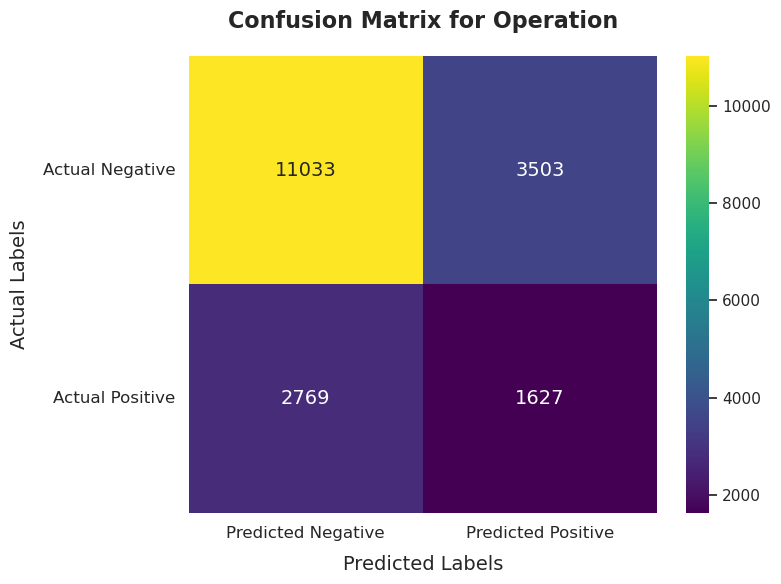

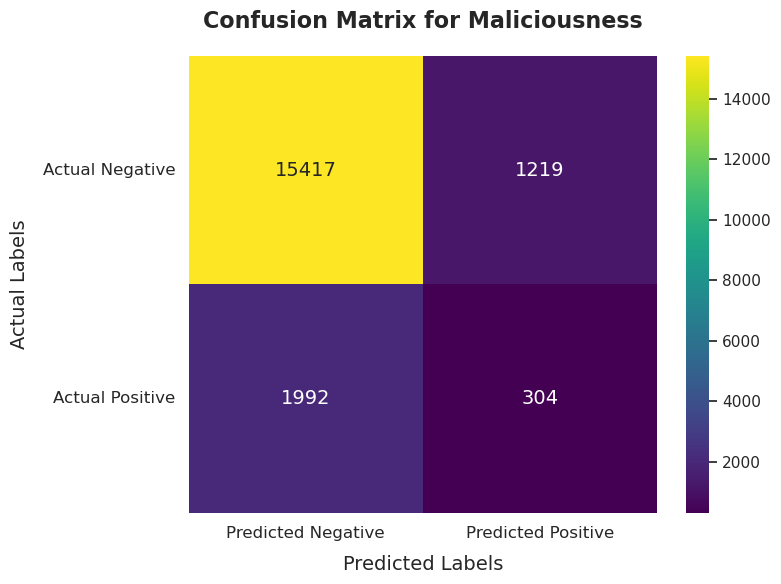

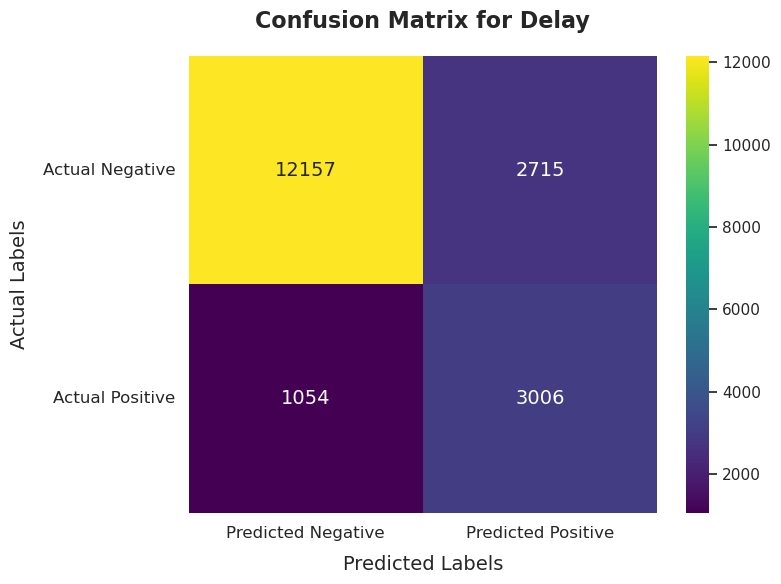

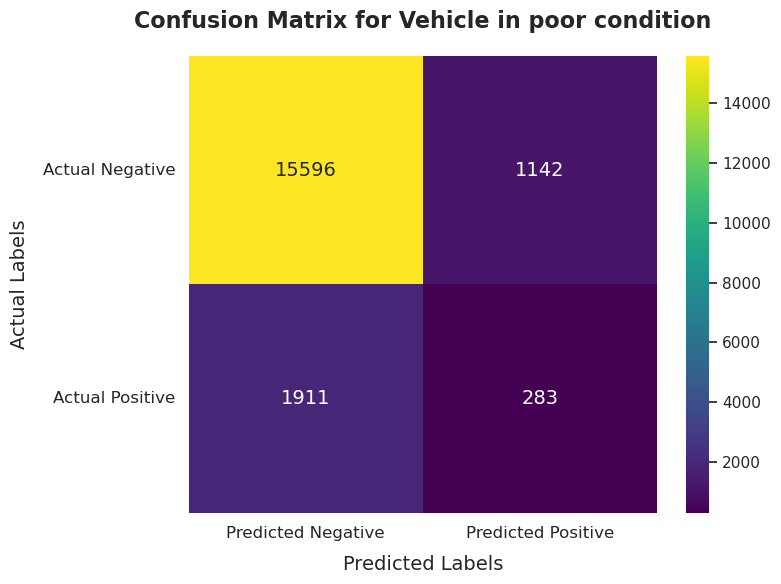

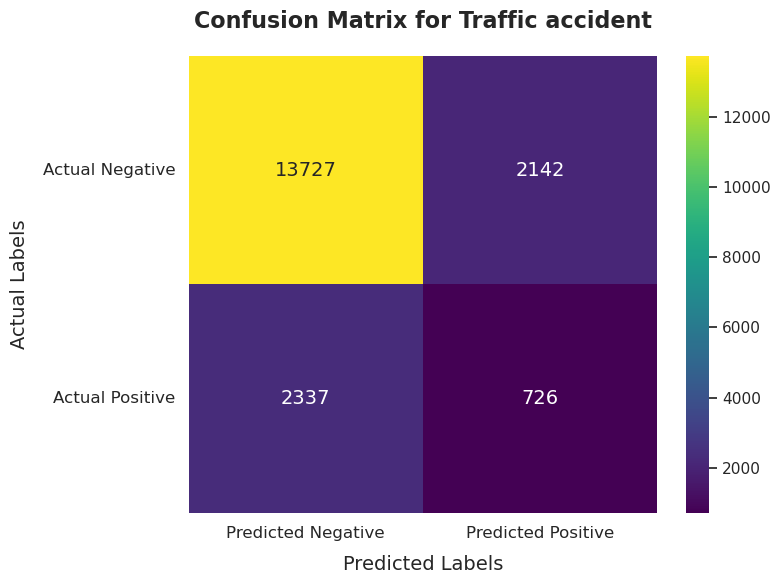

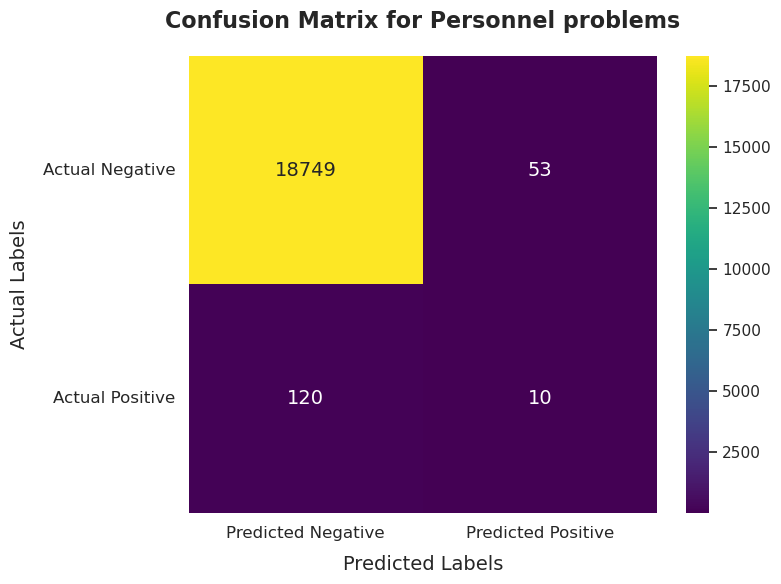

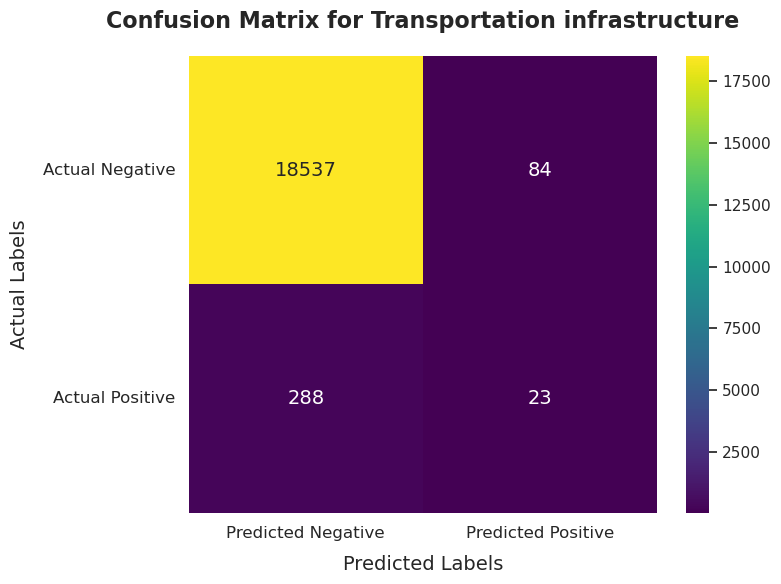

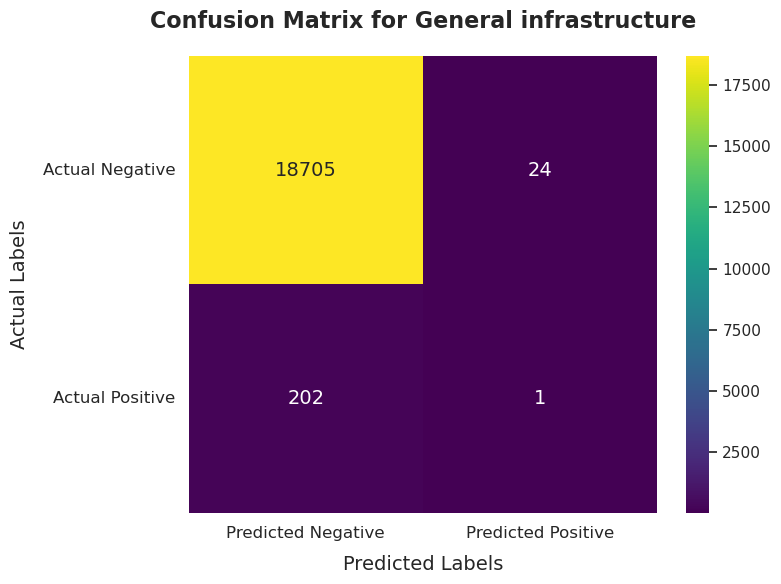

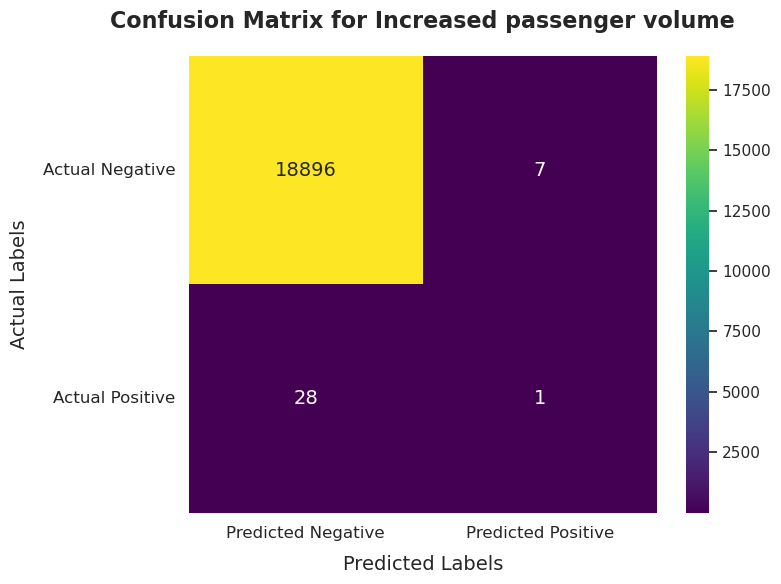

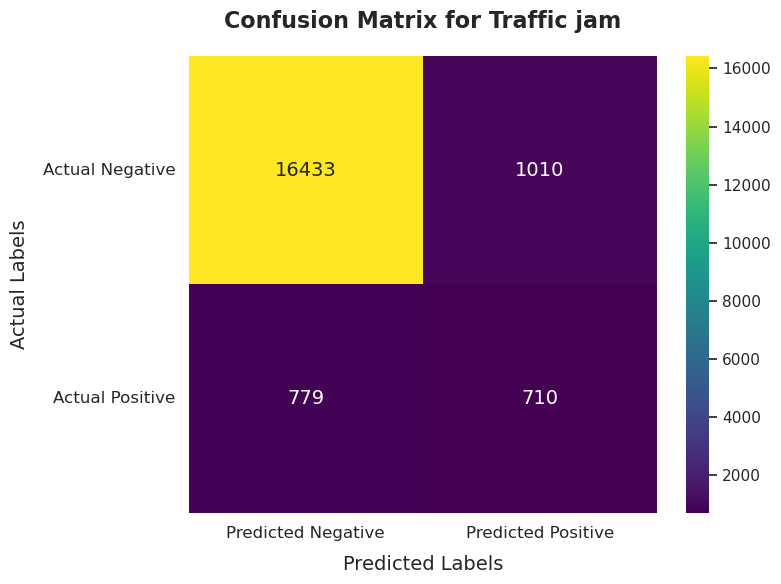

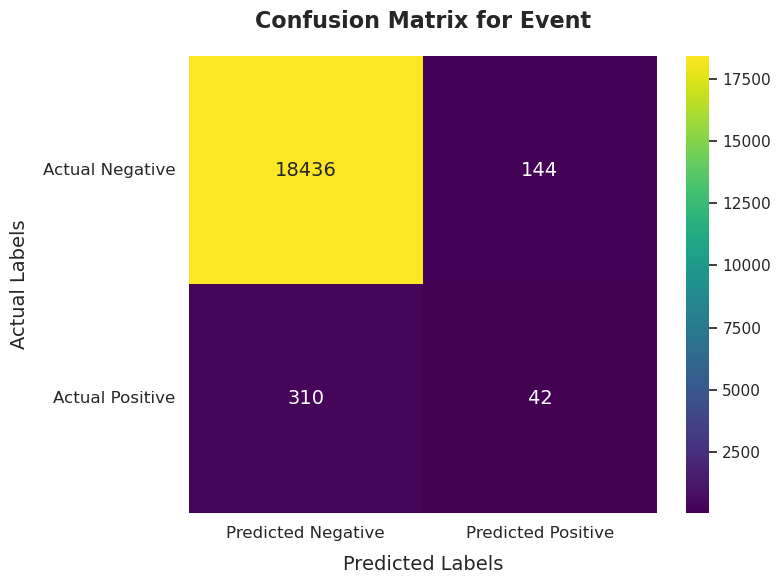

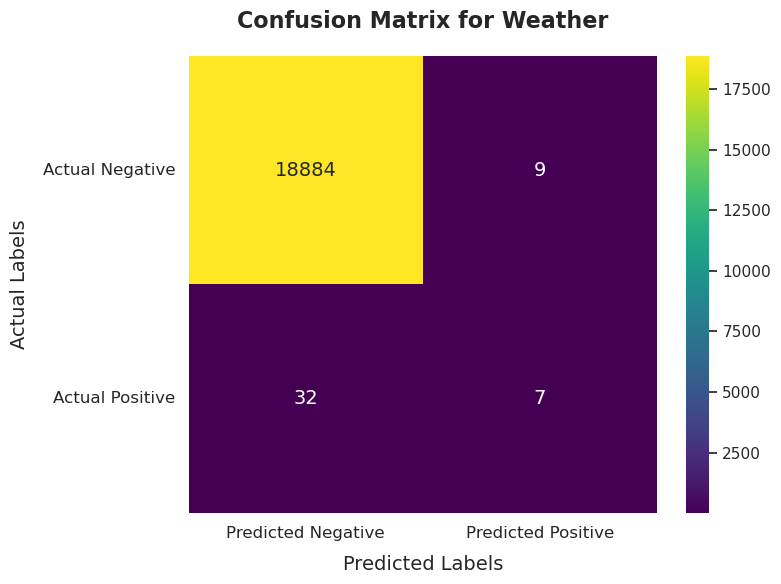

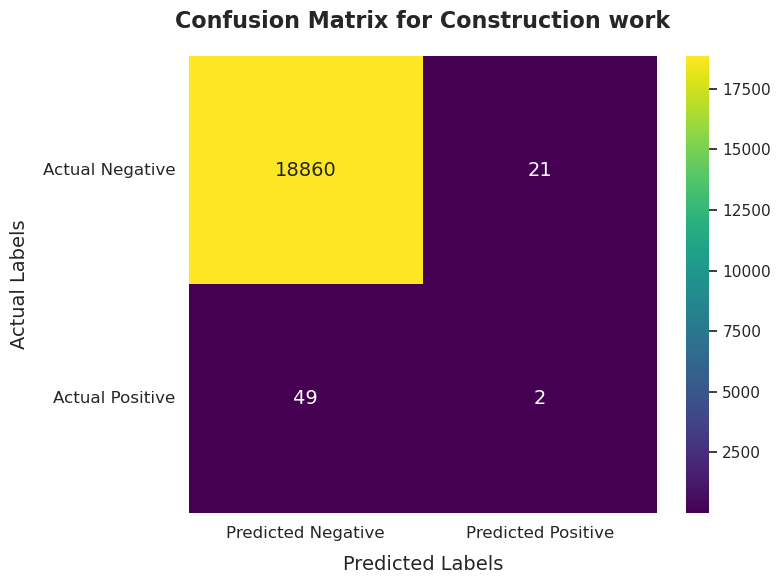

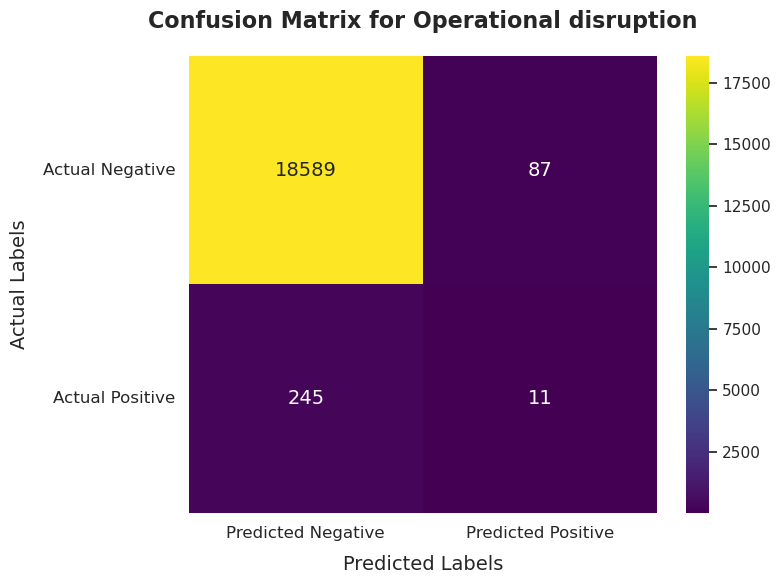

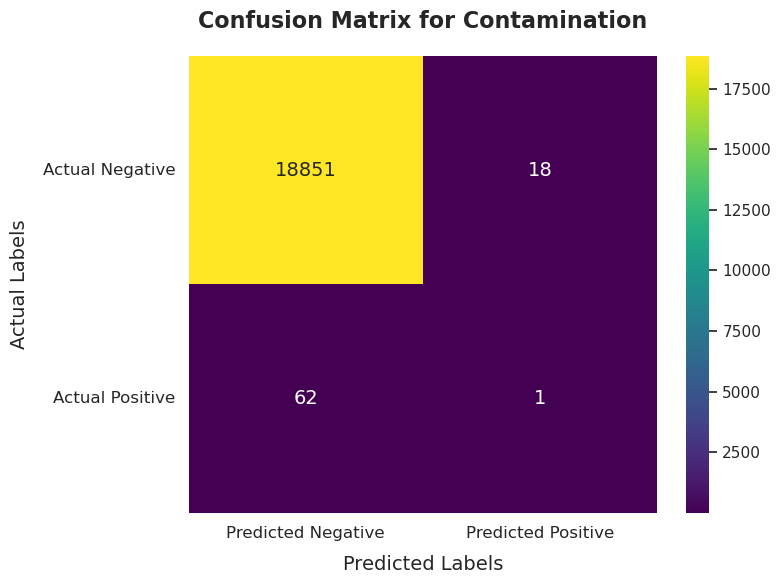

In [104]:
labels = data_processed['disruption'].unique()

# Plot the confusion matrix that was generated in the cell before in a nice format. Each class should have its own representation.
def plot_confusion_matrix(cm, class_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True, annot_kws={"size": 14},xticklabels=['Predicted Negative', 'Predicted Positive'],yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {class_name}', fontsize=16, weight='bold', pad=20)
    plt.xlabel('Predicted Labels', fontsize=14, labelpad=10)
    plt.ylabel('Actual Labels', fontsize=14, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12, rotation=0)
    plt.tight_layout()
    plt.show()

for class_name in labels:
    class_index = data_processed[data_processed['disruption'] == class_name]['class'].iloc[0]
    class_cm = cm[class_index, :, :]
    plot_confusion_matrix(class_cm, class_name)


## Task 8: Test model on unknown data (5 Points)

Use the test data created in Section 7.1 and predict traffic disruptions for this data using the best model you found on the training data.

In [105]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18932 entries, 79452 to 31326
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_dailyMean  18932 non-null  float64
 1   hum_dailyMean   18932 non-null  float64
 2   wind_dailyMean  18932 non-null  float64
 3   precip          18932 non-null  float64
 4   bus             18932 non-null  bool   
 5   subway          18932 non-null  bool   
 6   tram            18932 non-null  bool   
 7   duration        18932 non-null  float64
 8   class           18932 non-null  int64  
dtypes: bool(3), float64(5), int64(1)
memory usage: 1.1 MB


In [106]:
disruption_types = data_processed['class'].unique()
disruption_types

array([ 7,  6,  2, 13, 10,  9, 12,  4,  5, 11,  3, 14,  0,  8,  1])

### 8.1 Train & predict with best model

Set your best model

In [107]:
scaler = StandardScaler()
best_model = make_pipeline(scaler, RandomForestClassifier(random_state=student_id, criterion="gini"))

In [108]:
assert isinstance(best_model, sklearn.pipeline.Pipeline) or isinstance(best_model,tuple(all_methods))

In [109]:
data_train, data_test = split_data(data_processed[['temp_dailyMean', 'hum_dailyMin', 'hum_dailyMax', 'hum_dailyMean', 'bus', 'subway', 'tram', 'class']])

def train_and_predict(best_model, train_data: pd.DataFrame, test_data: pd.DataFrame):
    X_train = train_data[features]
    y_train = train_data['class']
    X_test = test_data[features]
    best_model.fit(X_train, y_train)
    
    predictions = best_model.predict(X_test)
    return predictions #, probabilities

In [110]:
# train with train data, predict on hidden test data. For hidden test data, we do not provide the weekly_infections values, of course!
unknown_prediction = train_and_predict(best_model, data_train, data_test.drop('class', axis=1)) 

In [111]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!

In [112]:
disruption_preds = np.unique(unknown_prediction)
disruption_preds

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [113]:
assert len(unknown_prediction.shape) == 1, "Predictions should only have 1 column!"
assert unknown_prediction.shape[0] == data_test.shape[0], "Predictions should have the same number of columns as test data!"

In [114]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!



### 8.2 Visualize Results

* Present the model performance on the test dataset by using one or more metrics from Section 7.3. 
* Use two meaningful representations for the results, e.g. classification report and confusion matrix.

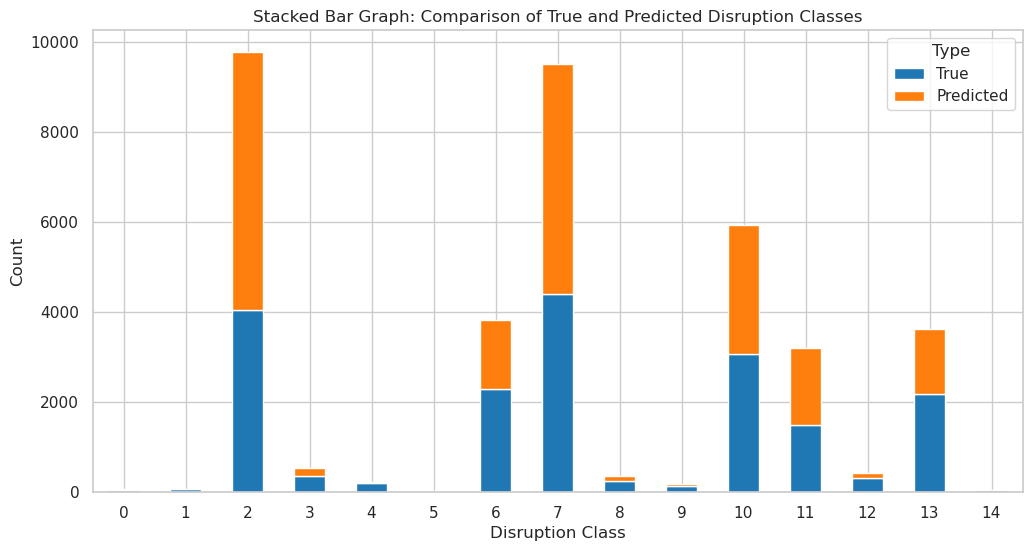

In [115]:
df_compare = pd.DataFrame({"True": data_test['class'], "Predicted": unknown_prediction})

true_counts = df_compare['True'].value_counts().sort_index()
predicted_counts = df_compare['Predicted'].value_counts().sort_index()

stacked_df = pd.DataFrame({'True': true_counts,'Predicted': predicted_counts}).fillna(0)

stacked_df.plot(kind='bar',stacked=True,figsize=(12, 6),color=['#1f77b4', '#ff7f0e']) 
# Add labels and title
plt.xlabel("Disruption Class")
plt.ylabel("Count")
plt.title("Stacked Bar Graph: Comparison of True and Predicted Disruption Classes")
plt.legend(title="Type", loc="upper right")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


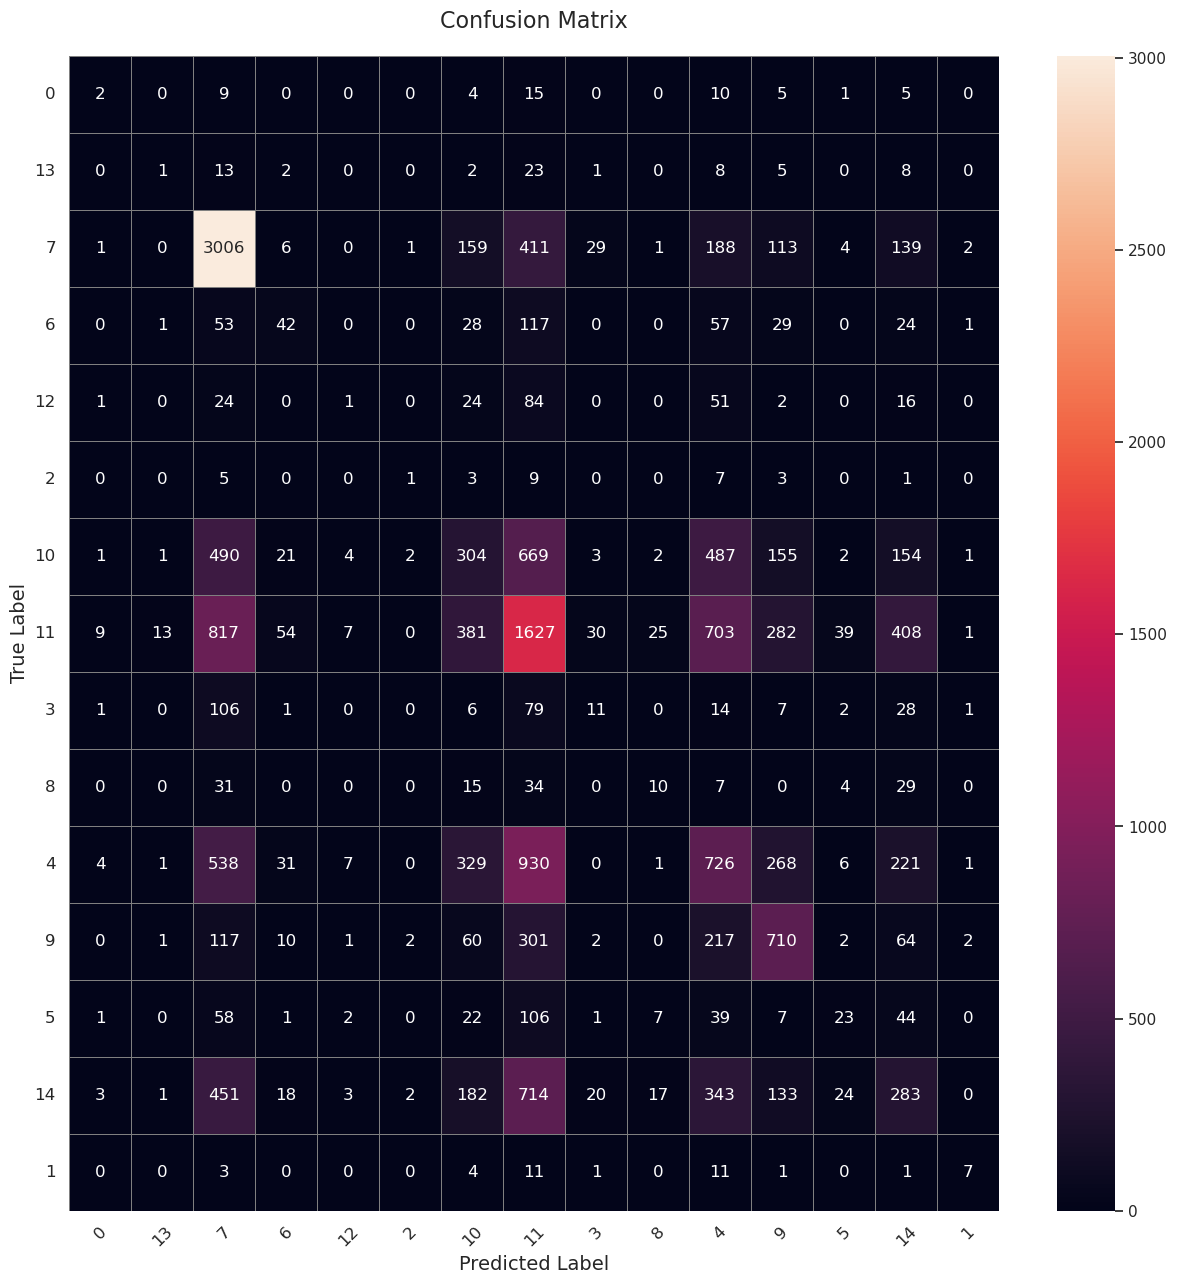


Scores:
accuracy_score: 0.3567504753855905
precision_score: 0.3192346746335307
recall_score: 0.3567504753855905


In [117]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(data_test['class'], unknown_prediction)
class_labels = data_test['class'].unique()
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cbar=True, linewidths=0.5, linecolor='gray')
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix", fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.show()

metrics_scores = compare_metrics(data_test['class'], unknown_prediction)
print_scores(metrics_scores)

In [118]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!